## Problem 1 - Linear Regression

###### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

##### <span style="color:green">Data Dictionary :</span>

##### Variable Name--------------Description
##### Carat	----------------------- Carat weight of the cubic zirconia.
##### Cut-------------------------- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
##### Color------------------------ Colour of the cubic zirconia.With D being the best and J the worst.
##### Clarity-----------------------Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, 
#####                                              FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
##### Depth-----------------------The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
##### Table------------------------The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
##### Price------------------------The Price of the cubic zirconia.
##### X-----------------------------Length of the cubic zirconia in mm.
##### Y-----------------------------Width of the cubic zirconia in mm.
##### Z-----------------------------Height of the cubic zirconia in mm.


##### <span style="color:red">Questions :</span>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
%matplotlib inline

##### <span style="color:purple"> 1.1)  Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.</span>

In [2]:
# Reading the data 

df_cubic =pd.read_csv('cubic_zirconia.csv') 
df_cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
# Information of the data 

df_cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
# Descriptive statistics to summarize the data

df_cubic.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [5]:
# Shape of the data (No. of Row's & Column's)

df_cubic.shape

(26967, 11)

In [6]:
# Checking for null values (if it is there)

df_cubic.isnull().values.any()

True

In [7]:
# Since the dataset contains null value we need to trace the same in detail

df_cubic.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
# Checking for duplicate data 

df_cubic.duplicated().values.any()

False

In [9]:
# Unique values present in categorical Columns

for column in df_cubic.columns:
    if df_cubic[column].dtype == 'object':
        print(column.upper(),': ',df_cubic[column].nunique())
        print(df_cubic[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [10]:
# Checking for unique values present in remaining other columns

df_cubic[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

In [11]:
# Extracting only continuous variables from the dataset

df_cubic_num = df_cubic.select_dtypes(include=['float64'])
Numeric_columns = list(df_cubic_num.columns.values)
len(Numeric_columns)

6

In [12]:
df_cubic_num.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


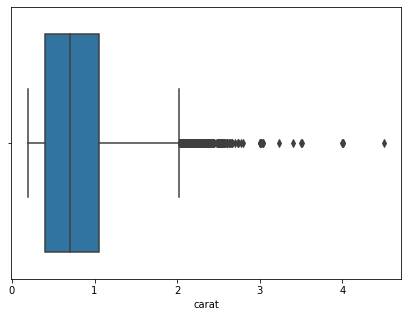

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


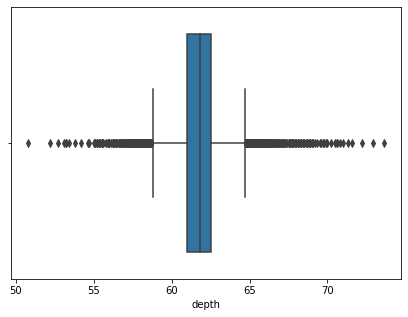

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


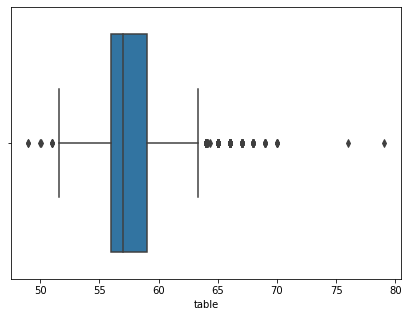

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


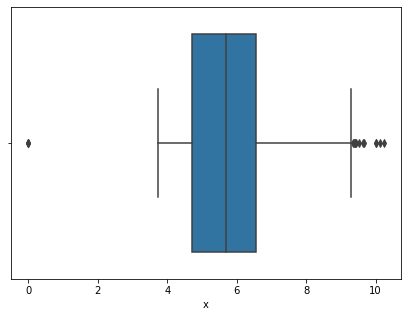

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


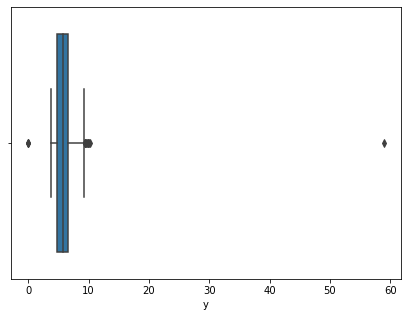

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


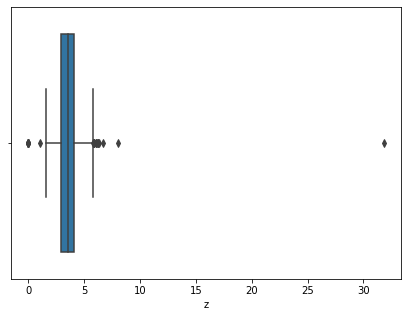

In [13]:
# Checking for outliers ( Excluded "Unnamed" as its used as index & "price" as its target variable in this dataset )

for column in df_cubic_num:
    plt.subplots(figsize=(7,5))
    sns.boxplot(df_cubic_num[column])
    plt.show()

In [14]:
# Defining a method for Univariate Analysis for numeric variables
def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_cubic_num[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_cubic_num[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_cubic_num[column])
    plt.show()

Description of carat
----------------------------------------------------------------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 
----------------------------------------------------------------------------
Distribution of carat
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


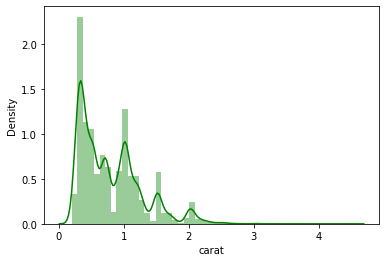

BoxPlot of carat
----------------------------------------------------------------------------


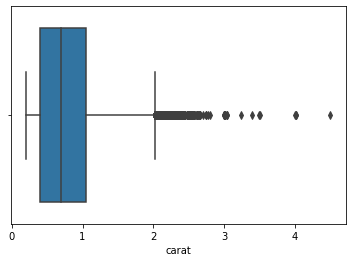

Description of depth
----------------------------------------------------------------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 
----------------------------------------------------------------------------
Distribution of depth
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


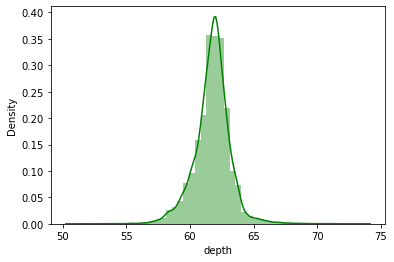

BoxPlot of depth
----------------------------------------------------------------------------


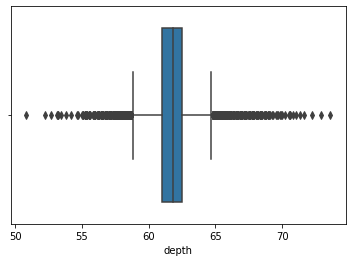

Description of table
----------------------------------------------------------------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 
----------------------------------------------------------------------------
Distribution of table
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


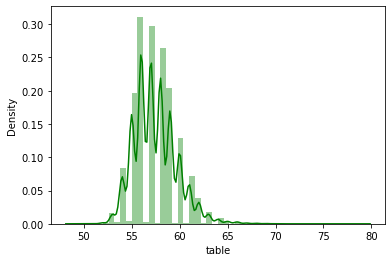

BoxPlot of table
----------------------------------------------------------------------------


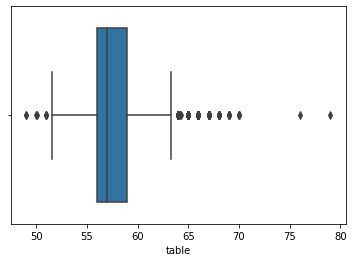

Description of x
----------------------------------------------------------------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 
----------------------------------------------------------------------------
Distribution of x
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


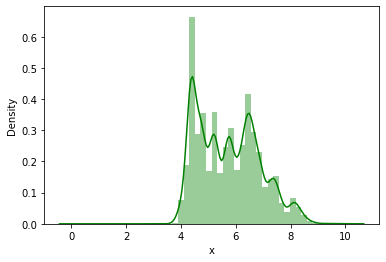

BoxPlot of x
----------------------------------------------------------------------------


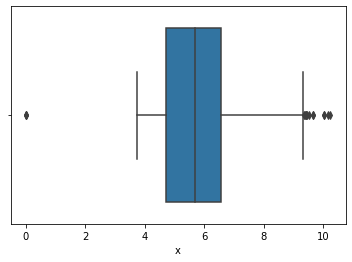

Description of y
----------------------------------------------------------------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64 
----------------------------------------------------------------------------
Distribution of y
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


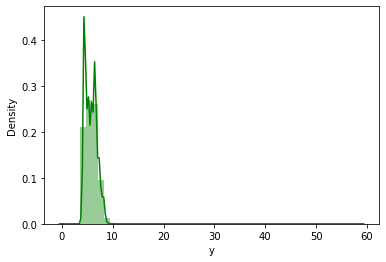

BoxPlot of y
----------------------------------------------------------------------------


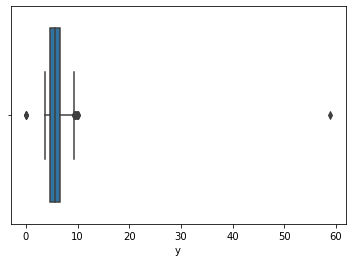

Description of z
----------------------------------------------------------------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 
----------------------------------------------------------------------------
Distribution of z
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


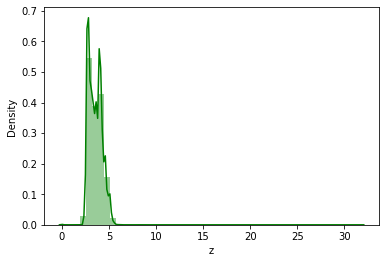

BoxPlot of z
----------------------------------------------------------------------------


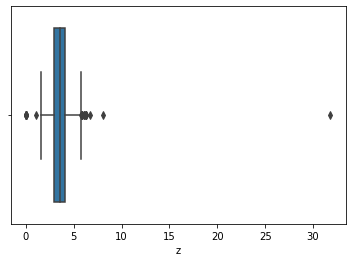

In [15]:
for x in df_cubic_num:
    univariateAnalysis(x,10)

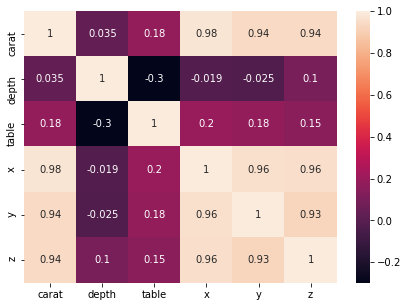

In [16]:
# Bi- Variate Analyis for numerical variables

plt.subplots(figsize=(7,5))
sns.heatmap(df_cubic_num.corr(),annot=True);

##### From the above heatmap we can see few correlation b/w few variables , for example carat is highly correlated with x,y & z .  x, y & z are correlated among themselves . Table & Depth are inversely correlated.

##### By using scatter plot we can depicts the correlation in a better way .

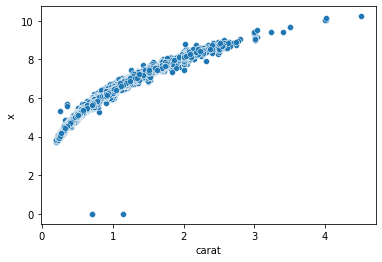

In [17]:
sns.scatterplot(data=df_cubic_num, x="carat", y="x");

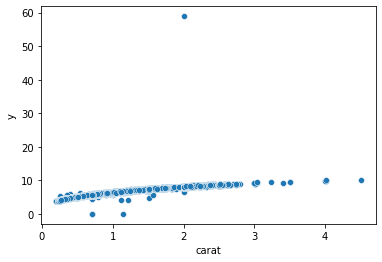

In [18]:
sns.scatterplot(data=df_cubic_num, x="carat", y="y");

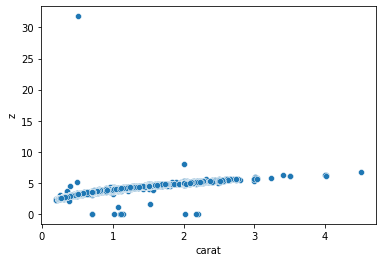

In [19]:
sns.scatterplot(data=df_cubic_num, x="carat", y="z");

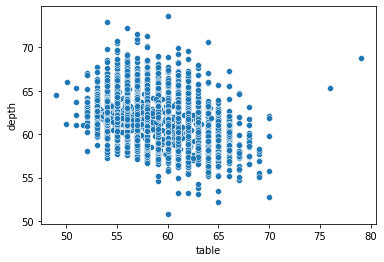

In [20]:
sns.scatterplot(data=df_cubic_num, x="table", y="depth");

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


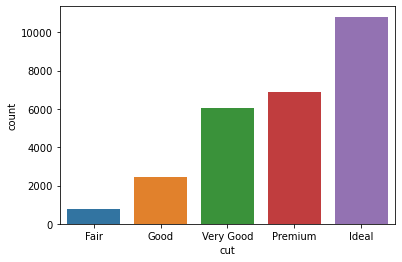

In [21]:
# Univariate analyis for categorical variables

sns.countplot(df_cubic['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


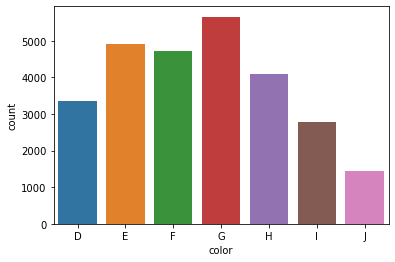

In [22]:
sns.countplot(df_cubic['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J']);

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


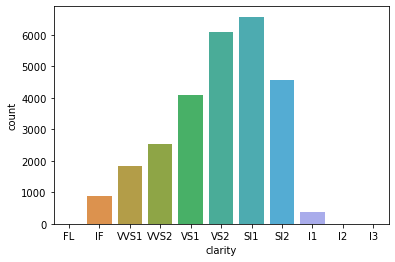

In [23]:
sns.countplot(df_cubic['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']);

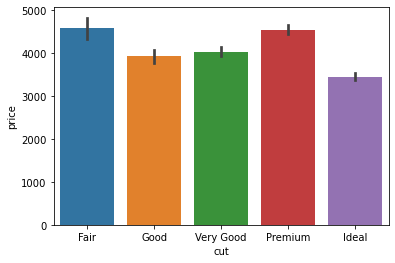

In [24]:
# Bi-variate analyis for categorical variables 

sns.barplot(data = df_cubic, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

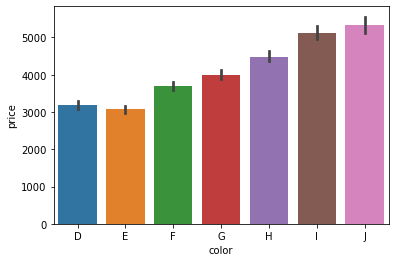

In [25]:
sns.barplot(data = df_cubic, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] );

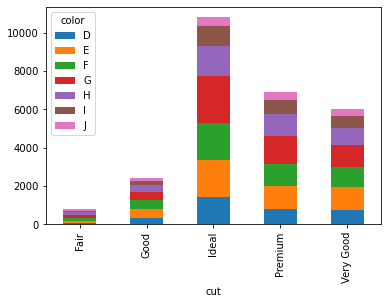

In [26]:
pd.crosstab(df_cubic['cut'], df_cubic['color']).plot(kind = 'bar', stacked = True);

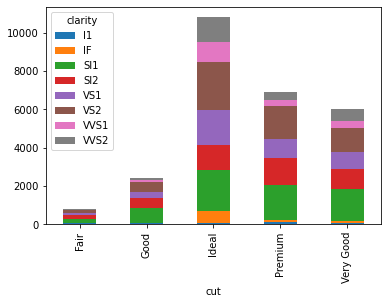

In [27]:
pd.crosstab(df_cubic['cut'], df_cubic['clarity']).plot(kind = 'bar', stacked = True);

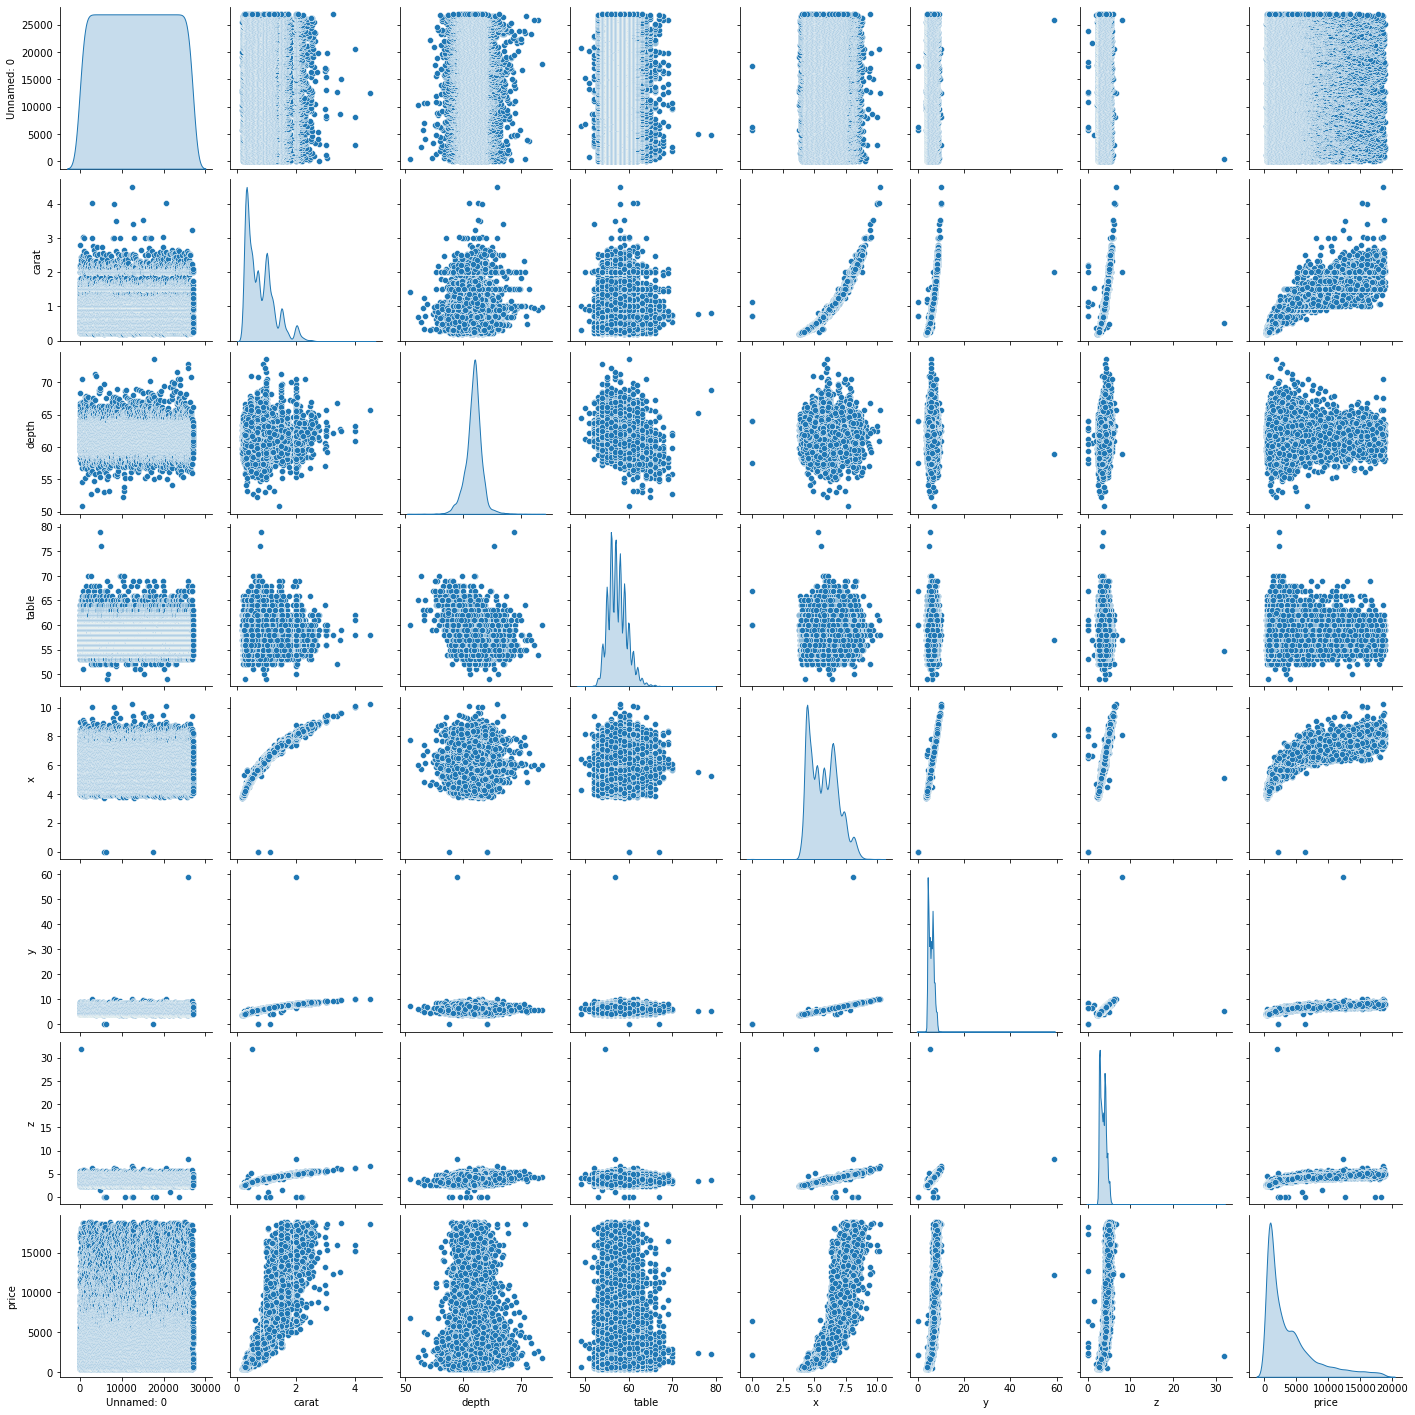

In [28]:
# Over all Data distribution through Pair plot

sns.pairplot(df_cubic, diag_kind='kde')  
plt.show()

##### <span style="color:purple"> 1.2)  Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case? </span>

In [29]:
# Checking for null values (if it is there)

df_cubic.isnull().values.any()

True

In [30]:
# Since the dataset contains null value we need to trace the same in detail

df_cubic.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [31]:
# Percentage of null/ missing values

100 * df_cubic.isnull().sum() / len(df_cubic)

Unnamed: 0    0.00000
carat         0.00000
cut           0.00000
color         0.00000
clarity       0.00000
depth         2.58464
table         0.00000
x             0.00000
y             0.00000
z             0.00000
price         0.00000
dtype: float64

In [33]:
# We see that the variables ‘x’, ’y’ and ‘z’ have zero as their value which practically is impossible as they are the physical attributes of zirconia (width, height etc.)

df_cubic.drop(df_cubic[((df_cubic['x'] == 0) | (df_cubic['y'] == 0) | (df_cubic['z'] == 0))].index, inplace=True)

In [34]:
# As we can see there is null value existance in "depth" variable , we need to impute the same by replacing median (we are choosing median instead mean as this data has outliers)

for column in df_cubic.columns:
    if df_cubic[column].dtype != 'object':
        median = df_cubic[column].median()
        df_cubic[column] = df_cubic[column].fillna(median)    
        
df_cubic.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [35]:
# This dataset require scaling as the magnitude of the columns are not in same range
# Creating instance of standard Scaler

sc = StandardScaler()

num = df_cubic.select_dtypes(exclude=['object'])

# update the cols with normalized values

df_cubic[num.columns] = sc.fit_transform(num)
df_cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


##### <span style="color:purple"> 1.3)  Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.</span>

In [36]:
#Converting categorical to dummy variables (One Hot Encoding)

data_cubic = pd.get_dummies(df_cubic, columns=['cut','color','clarity'],drop_first=True)
data_cubic.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# columns of the dataset 
data_cubic.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [38]:
# Train/ Test split

# Before going to split the data here we would like to drop "Unnamed:0" as its used as an index and not going to do any value add while evaluation

# drop the Unnamed:0 column as it is useless for the model

data_model = data_cubic.drop(columns=['Unnamed: 0'], axis=1)
data_model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Copy all Independent variables into X

X = data_model.drop('price', axis=1)

# Copy target into the y 

y = data_model[['price']]

In [40]:
# Spliting X and y into train and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [41]:
# Applying Linear Regresion Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Deriving the coefficients for each of the predictor variable

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient of {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient of carat is 1.367270935949181
The coefficient of depth is -0.027157297781958373
The coefficient of table is -0.015129062503321838
The coefficient of x is -0.3109893370891072
The coefficient of y is -0.0008718302715271618
The coefficient of z is -0.009459310770526735
The coefficient of cut_Good is 0.13136322591216146
The coefficient of cut_Ideal is 0.19405082192916592
The coefficient of cut_Premium is 0.1695361974418688
The coefficient of cut_Very Good is 0.1637510414681501
The coefficient of color_E is -0.045829921106505064
The coefficient of color_F is -0.06423152006658801
The coefficient of color_G is -0.10934322364634387
The coefficient of color_H is -0.23735034810633143
The coefficient of color_I is -0.3612269499771003
The coefficient of color_J is -0.5838191499347688
The coefficient of clarity_IF is 1.289947139967373
The coefficient of clarity_SI1 is 0.8895287879225809
The coefficient of clarity_SI2 is 0.6446204697130651
The coefficient of clarity_VS1 is 1.11185815

In [43]:
# Intercept for the model

intercept = model.intercept_[0]

print("The intercept of the model is {}".format(intercept))

The intercept of the model is -0.9907889549988897


In [44]:
# R square on training data

model.score(X_train, y_train)

0.9232445774547247

In [45]:
# R square on testing data

model.score(X_test, y_test)

0.9171155258688372

In [46]:
# RMSE on Training data

train_predict=model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,train_predict))

0.274480473337745

In [47]:
# RMSE on Testing data

test_predict=model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,test_predict))

0.29399280117472737

##### <span style="color:purple"> 1.4)  Inference: Basis on these predictions, what are the business insights and recommendations.</span>

In [48]:
# The dataset is to predict the price of the stone and to provide insights for the company on the profits on different prize slots.
# Initial analysis displayed that the ideal cut was most preferred and costly and in turn out to be profitable for the company. The ideal, premium and very good types of cut are generating profits whereas fair and good are not generating profits.
# 

# Inferences drawn from the above analysis:

# 1. cuts which are in general profitable to the company those should be sold & marketed better.
# 2. The clarity of the diamond is an important attribute. Hence the company should focus on maintaining the same quality for continious profits.
# 3. Few other attributes to be looked after are: carat, clarity_VS1, clarity_VS2, clarity_VVS1,clarity_VVS2.


## Problem 2 - Logistic Regression and LDA

###### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

##### <span style="color:green">Data Dictionary :</span>

##### Variable Name---------------Description
##### Holiday_Package------------Opted for Holiday Package yes/no?
##### Salary-------------------------Employee salary
##### age----------------------------Age in years
##### edu----------------------------Years of formal education
##### no_young_children----------The number of young children (younger than 7 years)
##### no_older_children------------Number of older children
##### foreign------------------------Foreigner Yes/No

##### <span style="color:purple"> 2.1)  Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.</span>

In [49]:
# Reading the data 

df_holiday =pd.read_csv('Holiday_Package.csv') 
df_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [50]:
# Information of the data 

df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [51]:
# Descriptive statistics to summarize the data

df_holiday.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [52]:
# Shape of the data (No. of Row's & Column's)

df_holiday.shape

(872, 8)

In [53]:
# Checking for null values (if it is there)

df_holiday.isnull().values.any()

False

In [54]:
# Checking for duplicate data 

df_holiday.duplicated().values.any()

False

In [55]:
# Unique values present in categorical Columns

for column in df_holiday.columns:
    if df_holiday[column].dtype == 'object':
        print(column.upper(),': ',df_holiday[column].nunique())
        print(df_holiday[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [56]:
# Columns of the dataset

df_holiday.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [57]:
# Checking the proportion of "yes" & "no" in the target column

df_holiday.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [58]:
# Extracting only continuous variables from the dataset

df_holiday_num = df_holiday.select_dtypes(include=['int64'])
Numeric_columns = list(df_holiday_num.columns.values)
len(Numeric_columns)

6

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


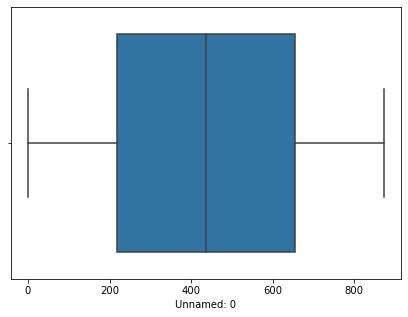

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


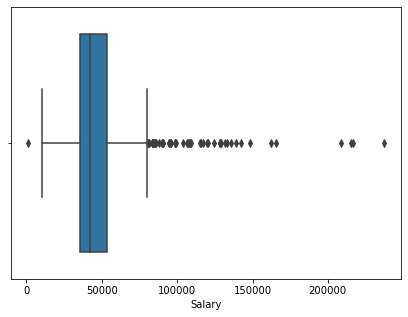

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


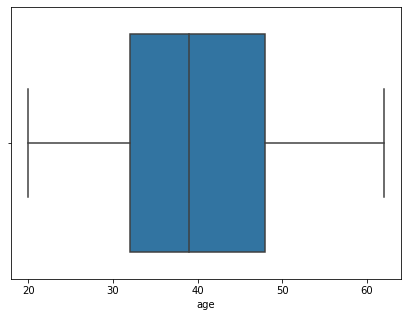

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


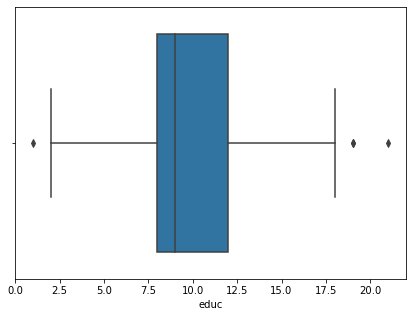

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


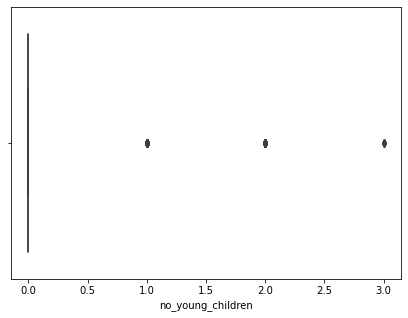

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


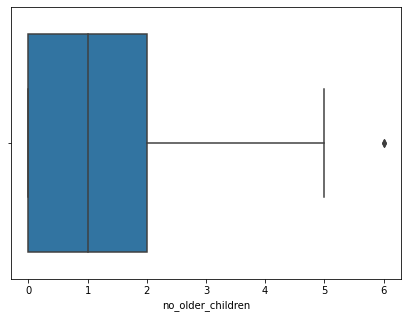

In [59]:
# Checking for outliers 

for column in df_holiday_num:
    plt.subplots(figsize=(7,5))
    sns.boxplot(df_holiday_num[column])
    plt.show()

In [60]:
# Defining a method for Univariate Analysis for numeric variables

def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_holiday_num[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_holiday_num[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_holiday_num[column])
    plt.show()

Description of Unnamed: 0
----------------------------------------------------------------------------
count    872.000000
mean     436.500000
std      251.869014
min        1.000000
25%      218.750000
50%      436.500000
75%      654.250000
max      872.000000
Name: Unnamed: 0, dtype: float64 
----------------------------------------------------------------------------
Distribution of Unnamed: 0
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


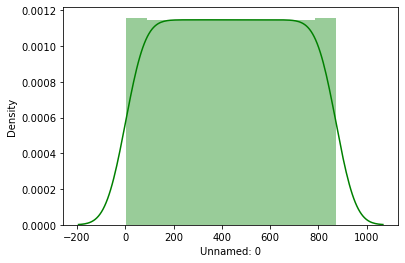

BoxPlot of Unnamed: 0
----------------------------------------------------------------------------


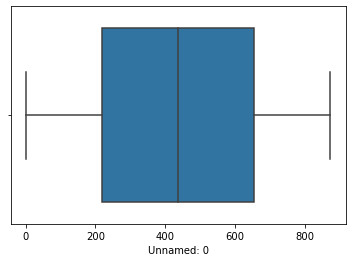

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 
----------------------------------------------------------------------------
Distribution of Salary
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


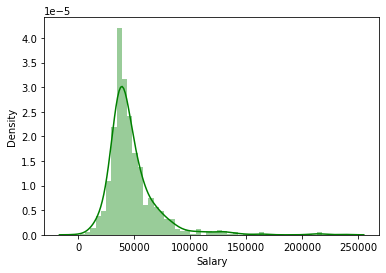

BoxPlot of Salary
----------------------------------------------------------------------------


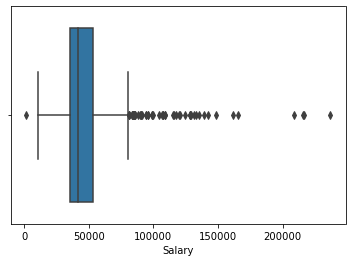

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 
----------------------------------------------------------------------------
Distribution of age
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


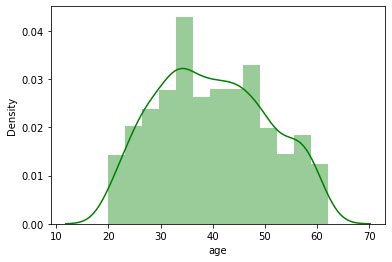

BoxPlot of age
----------------------------------------------------------------------------


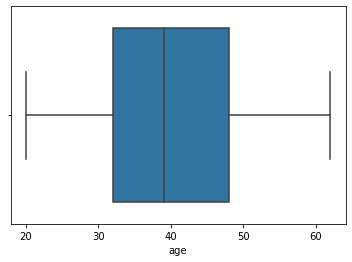

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 
----------------------------------------------------------------------------
Distribution of educ
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


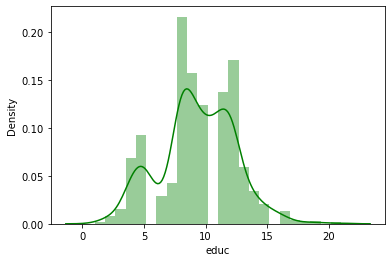

BoxPlot of educ
----------------------------------------------------------------------------


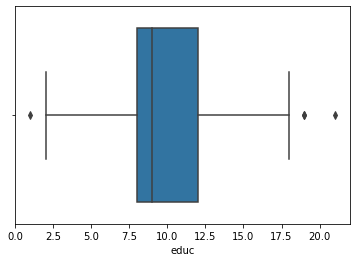

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 
----------------------------------------------------------------------------
Distribution of no_young_children
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


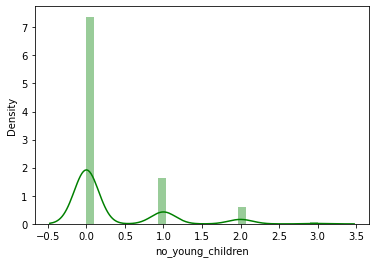

BoxPlot of no_young_children
----------------------------------------------------------------------------


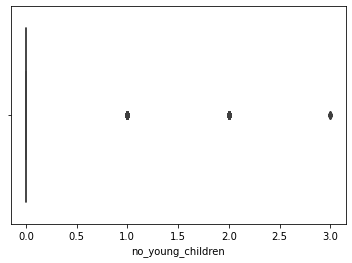

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 
----------------------------------------------------------------------------
Distribution of no_older_children
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


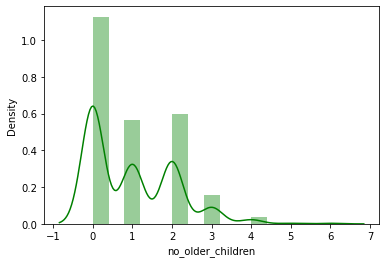

BoxPlot of no_older_children
----------------------------------------------------------------------------


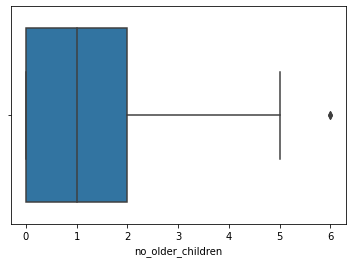

In [61]:
for x in df_holiday_num:
    univariateAnalysis(x,10)

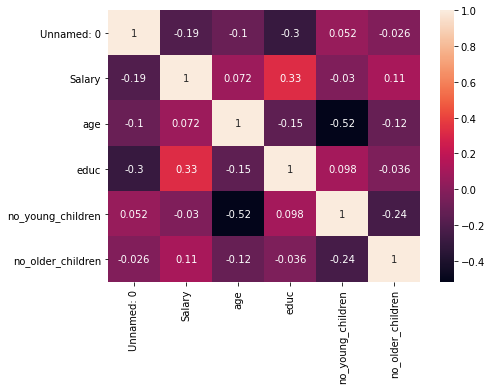

In [62]:
# Bi- Variate Analyis for numerical variables

plt.subplots(figsize=(7,5))
sns.heatmap(df_holiday_num.corr(),annot=True);

##### From the above heatmap we can derive that there is hardly any correlation observed among the continious predictors here. Out of these we can see that "Salary" & "educ" have comparitively better correlation , which is 33 %

##### By using scatter plot we can depicts the correlation in a better way .

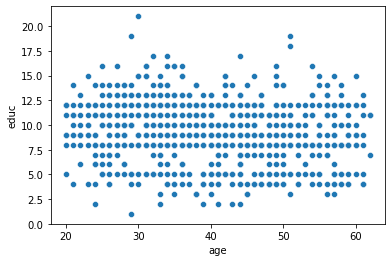

In [63]:
# Bi-variate analyis for numeric variables

sns.scatterplot(data=df_holiday_num, x="age", y="educ");

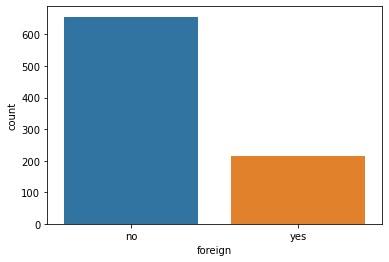

In [64]:
# Univariate analyis for categorical variables

sns.countplot(x="foreign", data=df_holiday);

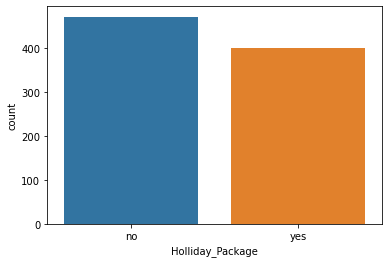

In [65]:
sns.countplot(x="Holliday_Package", data=df_holiday);

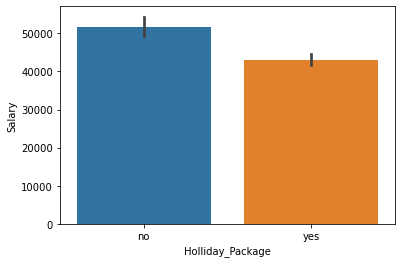

In [66]:
# Bi-variate analyis for categorical variables
sns.barplot(x="Holliday_Package", y="Salary",data=df_holiday);

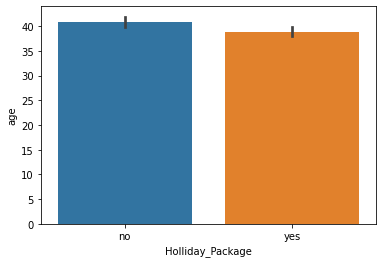

In [67]:
sns.barplot(x="Holliday_Package", y="age",data=df_holiday);

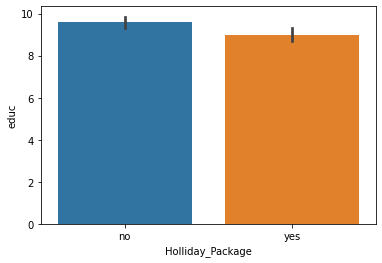

In [68]:
sns.barplot(x="Holliday_Package", y="educ",data=df_holiday);

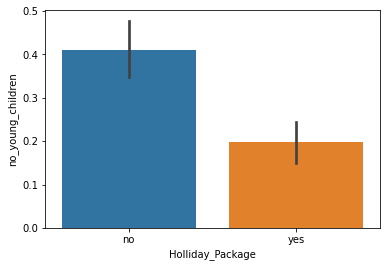

In [69]:
sns.barplot(x="Holliday_Package", y="no_young_children",data=df_holiday);

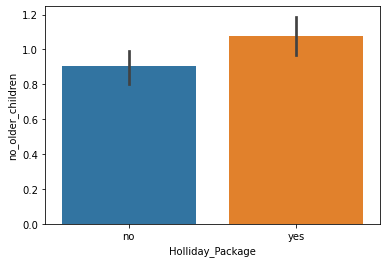

In [70]:
sns.barplot(x="Holliday_Package", y="no_older_children",data=df_holiday);

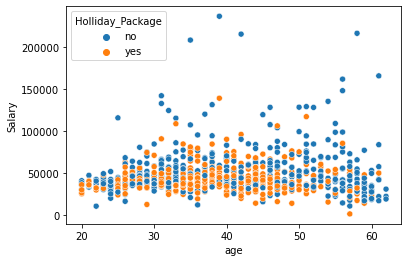

In [71]:
sns.scatterplot(data = df_holiday, x='age',y='Salary', hue = 'Holliday_Package');

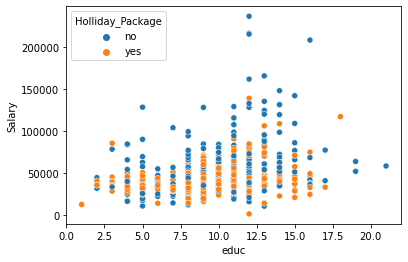

In [72]:
sns.scatterplot(data = df_holiday, x='educ',y='Salary', hue = 'Holliday_Package');

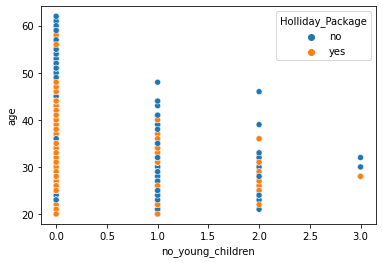

In [73]:
sns.scatterplot(data = df_holiday, x='no_young_children',y='age', hue = 'Holliday_Package');

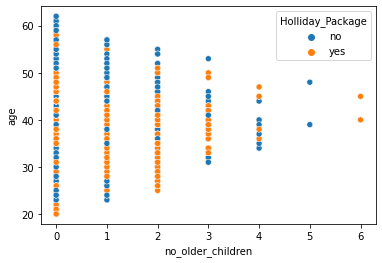

In [74]:
sns.scatterplot(data = df_holiday, x='no_older_children',y='age', hue = 'Holliday_Package');

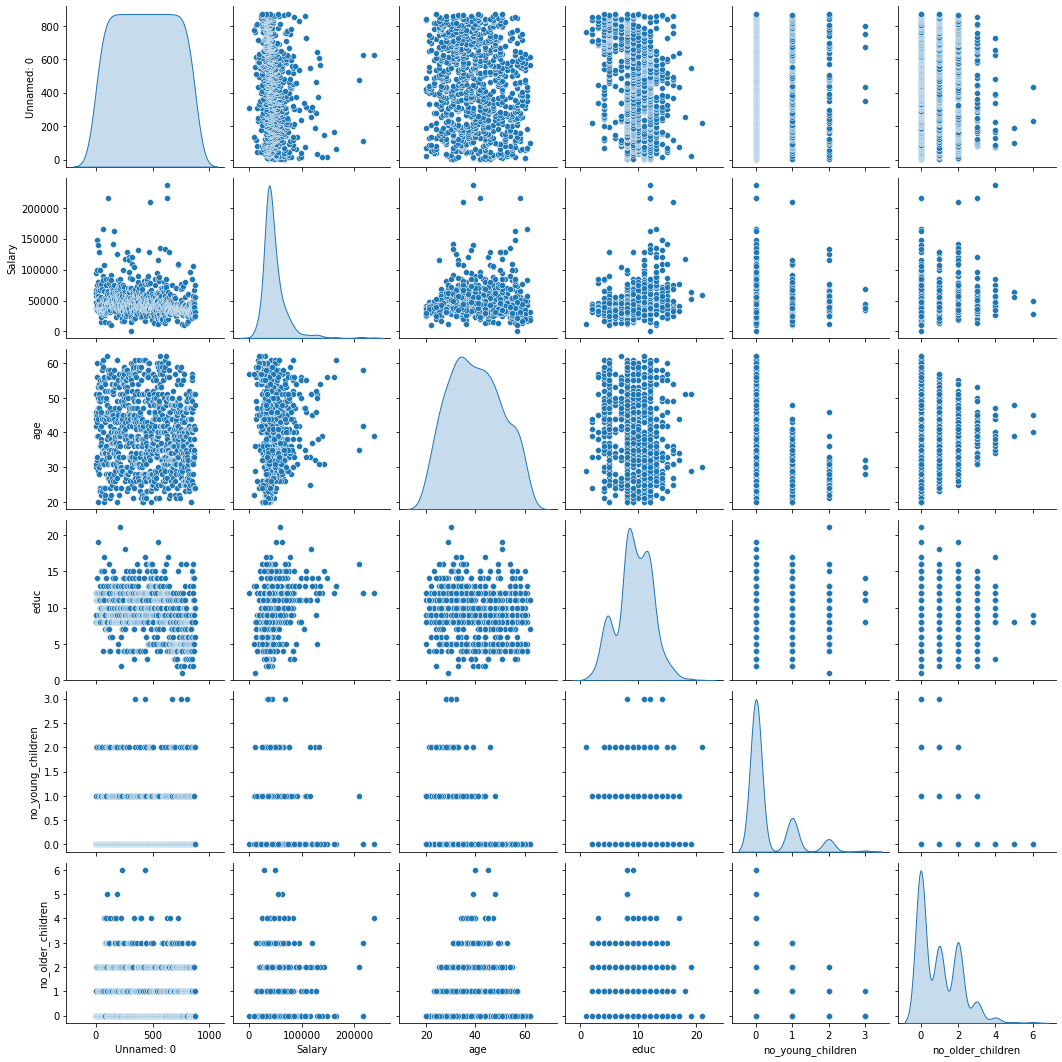

In [75]:
# Over all Data distribution through Pair plot

sns.pairplot(df_holiday, diag_kind='kde')  
plt.show()

##### <span style="color:purple"> 2.2)  Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis)</span>

##### <span style="color:purple"> 2.3)  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.</span>

In [76]:
# Before going ahead we are dropping the Unnamed:0 column as it is useless for the model

df_holiday.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [77]:
# Converting categorical to dummy variables in the dataset

data = pd.get_dummies(df_holiday, columns=['Holliday_Package','foreign'], drop_first = True)
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [78]:
# finally , checking the predictor columns 

data.columns 

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

In [79]:
# Copy all independent variables into X & target into the y  
X = data.drop('Holliday_Package_yes', axis=1)

y = data['Holliday_Package_yes']

In [80]:
# Spliting X and y into train and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [81]:
# Checking the target variable's status proportion 

y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [82]:
# Implementing GridSearchCV upon Logistic Regression for best results 

params={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [83]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [84]:
# Fitting the model with best parameters 

gridSearchCV = GridSearchCV(estimator = model, param_grid = params, cv = 3)
gridSearchCV.fit(X_train, y_train)

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/arnab/opt/anac

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]})

In [85]:
# Printing the best params & best estimator 

print(gridSearchCV.best_params_,'\n')
print(gridSearchCV.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [86]:
# Assigning best_model with "best_estimator_"
best_model = gridSearchCV.best_estimator_

In [87]:
# Prediction on the train & test set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [88]:
# Getting the probabilities on train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.250034,0.749966
1,0.718412,0.281588
2,0.620808,0.379192
3,0.239795,0.760205
4,0.540631,0.459369


In [89]:
# Getting the probabilities on test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.676003,0.323997
1,0.568908,0.431092
2,0.687614,0.312386
3,0.520186,0.479814
4,0.545382,0.454618


              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 



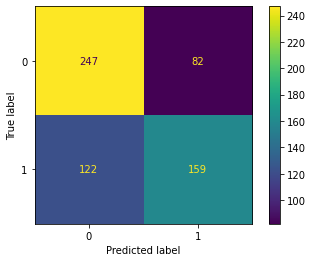

In [90]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

# confusion_matrix(train_labels,ytrain_predict_cart)
# sns.heatmap(confusion_matrix(train_labels,ytrain_predict_cart),annot=True, fmt='d',cbar=False, cmap='rainbow')
# plt.xlabel('Predicted Label')
# plt.ylabel('Actual Label')
# plt.title('Confusion Matrix of Train Data')
# plt.show()

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



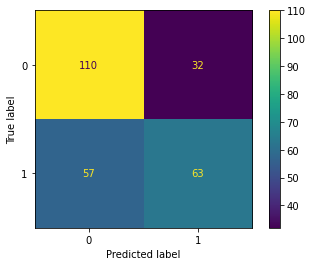

In [91]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.735


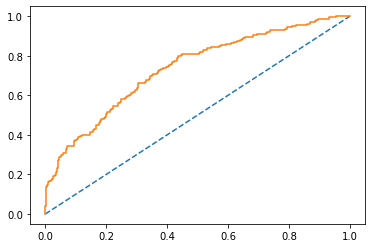

In [92]:
# AUC and ROC of the train dataset

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

AUC: 0.718


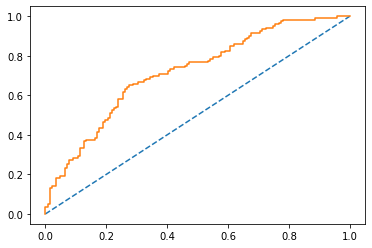

In [93]:
# AUC and ROC of the test dataset

# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

In [94]:
# Implementing LDA model with original data

df_holiday.head()

df1 = df_holiday

In [95]:
# Label encoding for categorical variables 

for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [96]:
# Checking head of the data after conversion

df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [97]:
# Copy all independent variables into X & target into the y  

X = df1.drop('Holliday_Package',axis=1)

Y = df1.pop('Holliday_Package')

In [98]:
# Spliting X and y into train and test set in 70:30 ratio

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [99]:
# Building LDA Model

clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [100]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [101]:
# Prediction on train & test data

pred_train = model.predict_proba(X_train)

pred_test = model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



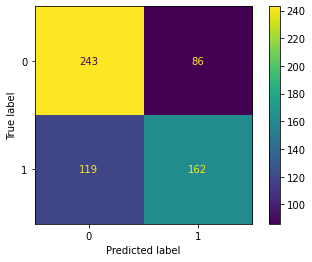

In [102]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



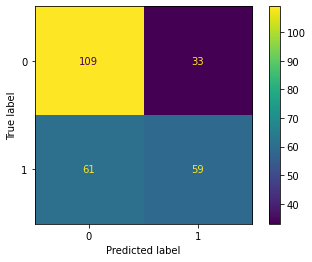

In [103]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.733


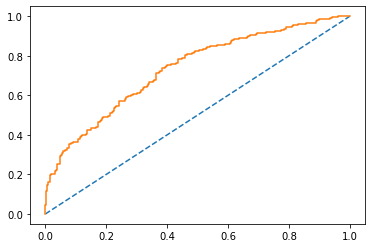

In [104]:
# AUC and ROC of the train dataset

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

AUC: 0.714


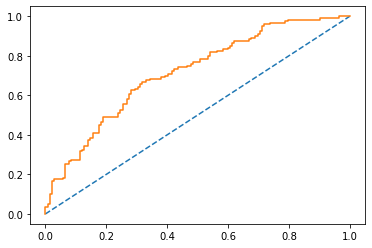

In [105]:
# AUC and ROC of the test dataset

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

In [106]:
# LR Classification report 
# ------------------------------

# Train Set
# ------------


#               precision    recall  f1-score   support

#            0       0.67      0.75      0.71       329
#            1       0.66      0.57      0.61       281

#     accuracy                           0.67       610
#    macro avg       0.66      0.66      0.66       610
# weighted avg       0.66      0.67      0.66       610


lr_train_acc = 0.67
lr_train_precision = 0.66
lr_train_recall = 0.57
lr_train_f1_score = 0.61
lr_train_auc = 0.735

# Test Set
# ------------


#               precision    recall  f1-score   support

#            0       0.66      0.77      0.71       142
#            1       0.66      0.53      0.59       120

#     accuracy                           0.66       262
#    macro avg       0.66      0.65      0.65       262
# weighted avg       0.66      0.66      0.65       262

lr_test_acc = 0.66
lr_test_precision = 0.66
lr_test_recall = 0.53
lr_test_f1_score = 0.59
lr_test_auc = 0.718


# LDA Classification report
# -------------------------------

# Train Set
# --------------


#               precision    recall  f1-score   support

#            0       0.67      0.74      0.70       329
#            1       0.65      0.58      0.61       281

#     accuracy                           0.66       610
#    macro avg       0.66      0.66      0.66       610
# weighted avg       0.66      0.66      0.66       610

lda_train_acc = 0.66
lda_train_precision = 0.65
lda_train_recall = 0.58
lda_train_f1_score = 0.61
lda_train_auc = 0.733

# Test Set
# ------------


#               precision    recall  f1-score   support

#            0       0.64      0.77      0.70       142
#            1       0.64      0.49      0.56       120

#     accuracy                           0.64       262
#    macro avg       0.64      0.63      0.63       262
# weighted avg       0.64      0.64      0.63       262
 
lda_test_acc = 0.64
lda_test_precision = 0.64
lda_test_recall = 0.49
lda_test_f1_score = 0.56
lda_test_auc = 0.714


In [107]:
# Comparison table based on above 2 (LR , LDA) reports

indices=['Accuracy','Precision','Recall','F1_score','AUC']
data_comparison = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_precision,lr_train_recall,lr_train_f1_score,lr_train_auc],
                    'LR Test':[lr_test_acc,lr_test_precision,lr_test_recall,lr_test_f1_score,lr_test_auc],
                    'LDA Train':[lda_train_acc,lda_train_precision,lda_train_recall,lda_train_f1_score,lda_train_auc],
                    'LDA Test':[lda_test_acc,lda_test_precision,lda_test_recall,lda_test_f1_score,lda_test_auc]},index=indices)
data_comparison

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.670,0.660,0.660,0.640
Precision,0.660,0.660,0.650,0.640
Recall,0.570,0.530,0.580,0.490
F1_score,0.610,0.590,0.610,0.560
AUC,0.735,0.718,0.733,0.714


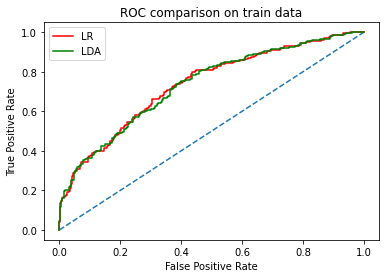

In [108]:
# Comparison graph based on above 2 ROC Curve (LR , LDA) based on train data

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_train_fpr,lr_train_tpr,color='red',label='LR')
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC comparison on train data')
plt.legend()
plt.show()


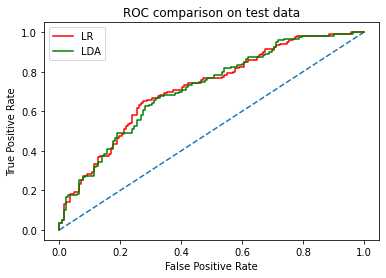

In [109]:
# Comparison graph based on above 2 ROC Curve (LR , LDA) based on test data

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_test_fpr,lr_test_tpr,color='red',label='LR')
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC comparison on test data')
plt.legend()
plt.show()

##### <span style="color:purple"> 2.4)  Inference: Basis on these predictions, what are the insights and recommendations.
</span>

In [110]:
# In the initial analysis we see that employees who were aged beyond 50 did not opt much for holiday packages. Also, employees with no children opted more for holiday packages. Salary range also played an important role for opting for holiday packages.
# Recommendation:
# 1. More affordable (budget-friendly) packages need to be introduced as more people can opt for it.
# 2. The packages should have an option where employees can customize based on their hobbies, interests age.
# 3. For employees with more that 2 children there should be some discount offers introduced so that they can be interested in the packages.
# 4. For senior(older) employees, a group package can be designed so they might get more interested to opt for them.

In [111]:
### THE END 